# **Demonstration**

In [1]:
import lattice
from lattice import Lattice, LineLattice, SquareLattice, TriangularLattice, HyperCubic
from hamiltonian import FermiHubbard
import retworkx as rx
import numpy as np
from math import pi

## ***General Lattice***

In [2]:
graph = rx.PyGraph(multigraph=False)
graph.add_nodes_from(range(6))
weighted_edge_list = [(0, 1, 1.0), (0, 2, -1.0), (2, 3, 2.0), (4, 2, -1.0), (4, 4, 3.0), (2, 5, -1.0)]
graph.add_edges_from(weighted_edge_list)

# make a lattice
general_lattice = Lattice(graph)

### **visualization**

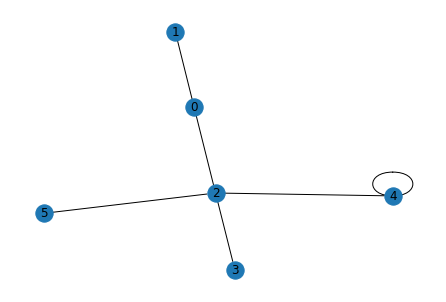

In [3]:
general_lattice.draw(self_loop=True, with_labels=True)

### **adjacency matrix(hopping matrix) $t_{x, y}$**

In [4]:
general_lattice.to_adjacency_matrix()

array([[ 0.+0.j,  1.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  2.+0.j, -1.+0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j,  2.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  3.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]])

### **Fermi-Hubbard model**

In [5]:
onsite_interaction = 2.0

FHM = FermiHubbard(
    lattice=general_lattice,
    onsite_interaction=onsite_interaction
)
ham = FHM.second_q_ops(display_format="sparse")

# even site -> up spin
# odd sites -> down spin
print(ham)

Fermionic Operator
register length=12, number terms=28
  (1+0j) * ( +_0 -_2 )
+ (-1+0j) * ( -_0 +_2 )
+ (-1+0j) * ( +_0 -_4 )
+ (1+0j) * ( -_0 +_4 )
+ (2+0j) * ( +_4 -_6 )
+ (-2+0j) * ( -_4 +_6 )
+ (-1+0j) * ( +_4 -_8 )
+ (1+0j) * ( -_4 +_8 )
+ (3+0j) ...


In [6]:
FHM.hopping_matrix()

array([[ 0.+0.j,  1.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  2.+0.j, -1.+0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j,  2.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  3.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]])

### **Fermi-Hubbard model with uniform hopping and on-site potential**

In [7]:
FHM = FermiHubbard.uniform_parameters(
    lattice=general_lattice,
    uniform_hopping=-1.0,
    uniform_onsite_potential=1.0,
    onsite_interaction=2.0
)
FHM.hopping_matrix()
lat = FHM._lattice

## ***Lattice from an adjacency matrix***

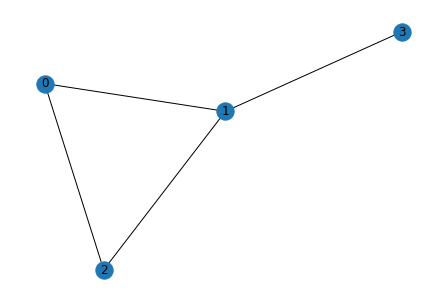

In [8]:
ad_mat = np.array(
    [
        [1.0 , -1.0 + 1.0j, 2.0, 0.0],
        [0.0, 2.0, -3.0, -1.0],
        [0.0, 0.0, 3.0, 0.0],
        [0.0, 0.0, 0.0, 4.0]
    ]
)

lattice_from_ad_mat = lattice.Lattice.from_adjacency_matrix(ad_mat)
lattice_from_ad_mat.draw(with_labels=True)

In [9]:
lattice_from_ad_mat.to_adjacency_matrix()

array([[ 1.+0.j, -1.+1.j,  2.+0.j,  0.+0.j],
       [-1.-1.j,  2.+0.j, -3.+0.j, -1.+0.j],
       [ 2.+0.j, -3.+0.j,  3.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  4.+0.j]])

### **Fermi-Hubbard model**

In [11]:
onsite_interaction = 2.0
FHM = FermiHubbard(
    lattice=lattice_from_ad_mat,
    onsite_interaction=onsite_interaction
)

ham = FHM.second_q_ops()
print(ham)

Fermionic Operator
register length=8, number terms=28
  (1+0j) * ( NIIIIIII )
+ (-1+1j) * ( +I-IIIII )
+ (1+1j) * ( -I+IIIII )
+ (2+0j) * ( +III-III )
+ (-2+0j) * ( -III+III )
+ (2+0j) * ( IINIIIII )
+ (-3+0j) * ( II+I-III )
+ (3+0j) * ( II-I+III )
+ ...


/Users/kensuketamura/Git/Project/qiskit-nature/qiskit_nature/problems/lattice/hamiltonian.py:91: UserWarning: The default value for `display_format` will be changed from 'dense' to 'sparse' in version 0.3.0. Once that happens, you must specify display_format='dense' directly.
  return FermionicOp(ham, register_length=register_length, display_format=display_format)


## ***One-dimensional case(open boundary condition)***

In [ ]:
lattice_points = 4
t = -1.0
onsite_potential = 1.0
one_dim_lattice = LineLattice(
    num_nodes=lattice_points,
    edge_parameter=t,
    onsite_parameter=onsite_potential,
    boundary_condition="open"
)

### **visualization**

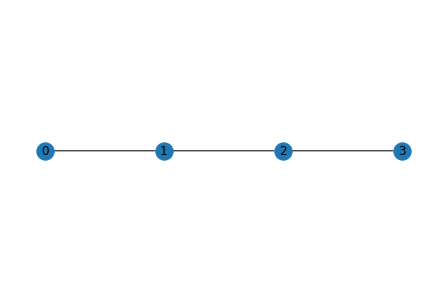

In [ ]:
pos = {0:[0, 0], 1:[1, 0], 2:[2, 0], 3:[3, 0]}
one_dim_lattice.draw(pos=pos, with_labels=True)

### **Fermi-Hubbard model**

In [ ]:
onsite_interaction = 5.0
FHM = FermiHubbard(
    one_dim_lattice,
    onsite_interaction
)
ham = FHM.second_q_ops()
print(ham)

  +_0 -_2 * (-1+0j)
+ -_0 +_2 * (1+0j)
+ +_2 -_4 * (-1+0j)
+ -_2 +_4 * (1+0j)
+ +_4 -_6 * (-1+0j)
+ -_4 +_6 * (1+0j)
+ +_0 -_0 * (1+0j)
+ +_2 -_2 * (1+0j)
+ +_4 -_4 * (1+0j)
+ +_6 -_6 * (1+0j)
+ +_1 -_3 * (-1+0j)
+ -_1 +_3 * (1+0j)
+ +_3 -_5 * (-1+0j)
+ -_3 +_5 * (1+0j)
+ +_5 -_7 * (-1+0j)
+ -_5 +_7 * (1+0j)
+ +_1 -_1 * (1+0j)
+ +_3 -_3 * (1+0j)
+ +_5 -_5 * (1+0j)
+ +_7 -_7 * (1+0j)
+ +_0 -_0 +_1 -_1 * (5+0j)
+ +_2 -_2 +_3 -_3 * (5+0j)
+ +_4 -_4 +_5 -_5 * (5+0j)
+ +_6 -_6 +_7 -_7 * (5+0j)


In [ ]:
FHM.hopping_matrix()

array([[ 1.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [-1.+0.j,  1.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  1.+0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  1.+0.j]])

### **Operator expression**

$$
\begin{align*}
H &= \sum_{i = 0}^{2} \sum_{\sigma = \uparrow, \downarrow} (t c_{i, \sigma}^\dagger c_{i+1, \sigma} + t c_{i+1, \sigma}^\dagger c_{i, \sigma})+ U \sum_{i=0}^{3} n_{i, \uparrow} n_{i, \downarrow} \\
&= t c_{0, \uparrow}^\dagger c_{1, \uparrow} - t c_{0, \uparrow} c_{1, \uparrow}^{\dagger} \\
& \ + t c_{1, \uparrow}^\dagger c_{2, \uparrow} - t c_{1, \uparrow} c_{2, \uparrow}^{\dagger} \\
& \ + t c_{2, \uparrow}^\dagger c_{3, \uparrow} - t c_{2, \uparrow} c_{3, \uparrow}^{\dagger} \\
& \ + v n_{0, \uparrow} + v n_{1, \uparrow} + v n_{2, \uparrow} + v n_{3, \uparrow} \\
& \ + t c_{0, \downarrow}^\dagger c_{1, \downarrow} - t c_{0, \downarrow} c_{1, \downarrow}^{\dagger} \\
& \ + t c_{1, \downarrow}^\dagger c_{2, \downarrow} - t c_{1, \downarrow} c_{2, \downarrow}^{\dagger} \\
& \ + t c_{2, \downarrow}^\dagger c_{3, \downarrow} - t c_{2, \downarrow} c_{3, \downarrow}^{\dagger} \\
& \ + v n_{0, \downarrow} + v n_{1, \downarrow} + v n_{2, \downarrow} + v n_{3, \downarrow} \\
& \ + U n_{0, \uparrow} n_{0, \downarrow} + U n_{1, \uparrow} n_{1, \downarrow} + + U n_{2, \uparrow} n_{2, \downarrow} + U n_{3, \uparrow} n_{3, \downarrow}
\end{align*}
$$

## ***One-dimensional case (periodic boundary condition)***

In [ ]:
lattice_points = 4
t = -1.0
onsite_potential = 1.0
one_dim_lattice = LineLattice(
    num_nodes=lattice_points,
    edge_parameter=t,
    onsite_parameter=onsite_potential,
    boundary_condition="periodic"
)

### **visualization**

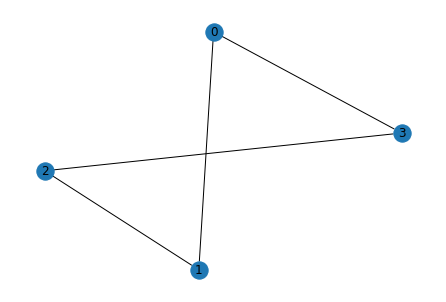

In [ ]:
one_dim_lattice.draw(with_labels=True)

### **Fermi-Hubbard model**

In [ ]:
FHM = FermiHubbard(
    one_dim_lattice,
    onsite_interaction
)

ham = FHM.second_q_ops()
print(ham)

  +I-IIIII * (-1+0j)
+ -I+IIIII * (1+0j)
+ II+I-III * (-1+0j)
+ II-I+III * (1+0j)
+ IIII+I-I * (-1+0j)
+ IIII-I+I * (1+0j)
+ NIIIIIII * (1+0j)
+ IINIIIII * (1+0j)
+ IIIINIII * (1+0j)
+ IIIIIINI * (1+0j)
+ +IIIII-I * (-1+0j)
+ -IIIII+I * (1+0j)
+ I+I-IIII * (-1+0j)
+ I-I+IIII * (1+0j)
+ III+I-II * (-1+0j)
+ III-I+II * (1+0j)
+ IIIII+I- * (-1+0j)
+ IIIII-I+ * (1+0j)
+ INIIIIII * (1+0j)
+ IIINIIII * (1+0j)
+ IIIIINII * (1+0j)
+ IIIIIIIN * (1+0j)
+ I+IIIII- * (-1+0j)
+ I-IIIII+ * (1+0j)
+ NNIIIIII * (5+0j)
+ IINNIIII * (5+0j)
+ IIIINNII * (5+0j)
+ IIIIIINN * (5+0j)


In [ ]:
FHM.hopping_matrix()

array([[ 1.+0.j, -1.+0.j,  0.+0.j, -1.+0.j],
       [-1.+0.j,  1.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  1.+0.j, -1.+0.j],
       [-1.+0.j,  0.+0.j, -1.+0.j,  1.+0.j]])

In [ ]:
try:
    LineLattice.from_adjacency_matrix()
except NotImplementedError:
    print("Error")

Error


## ***Square lattice***

In [ ]:
rows = 6
cols = 4
square = SquareLattice(
    rows=rows,
    cols=cols,
    edge_parameter=(1.0, -1.0),
    onsite_parameter=1.0,
    boundary_condition="periodic"
)

### **visualization**

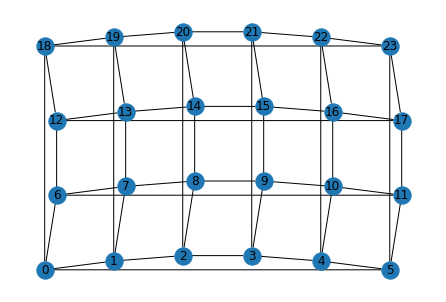

In [ ]:
def indextocoord(index:int, size:list, distortion=0.0) -> list:
    rows = size[0]
    cols = size[1]
    x = index % rows
    y = index // rows 
    return_x = x + distortion*np.sin(pi*y/(cols-1))
    return_y = y + distortion*np.sin(pi*x/(rows-1))
    return [return_x, return_y]
pos = dict([(index, indextocoord(index, [rows, cols], distortion=0.2)) for index in range(np.prod([rows, cols]))])
square.draw(pos=pos, with_labels=True)

### **Fermi-Hubbard model**

In [ ]:
onsite_interaction = 2.0
FHM = FermiHubbard(
    lattice=square,
    onsite_interaction=onsite_interaction
)

ham = FHM.second_q_ops()
print(ham)

  +I-IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII * (1+0j)
+ -I+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII * (-1+0j)
+ IIIIIIIIIIII+I-IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII * (1+0j)
+ IIIIIIIIIIII-I+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII * (-1+0j)
+ IIIIIIIIIIIIIIIIIIIIIIII+I-IIIIIIIIIIIIIIIIIIIII * (1+0j)
+ IIIIIIIIIIIIIIIIIIIIIIII-I+IIIIIIIIIIIIIIIIIIIII * (-1+0j)
+ IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII+I-IIIIIIIII * (1+0j)
+ IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII-I+IIIIIIIII * (-1+0j)
+ II+I-IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII * (1+0j)
+ II-I+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII * (-1+0j)
+ IIIIIIIIIIIIII+I-IIIIIIIIIIIIIIIIIIIIIIIIIIIIIII * (1+0j)
+ IIIIIIIIIIIIII-I+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIII * (-1+0j)
+ IIIIIIIIIIIIIIIIIIIIIIIIII+I-IIIIIIIIIIIIIIIIIII * (1+0j)
+ IIIIIIIIIIIIIIIIIIIIIIIIII-I+IIIIIIIIIIIIIIIIIII * (-1+0j)
+ IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII+I-IIIIIII * (1+0j)
+ IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII-I+IIIIIII * (-1+0j)
+ IIII+I-IIIIIIIIIIIIIIIIIIIIIII

In [ ]:
FHM.hopping_matrix()

array([[ 1.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j, -1.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j],
       [ 1.+0.j,  1.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        -1.+0.j,  0.+0.j,  0.+0.j],
    

## ***Triangular lattice***

In [ ]:
rows = 6
cols = 4
edge_parameter = (1.0, 2.0, 3.0)
onsite_parameter = 1.0
triangular = TriangularLattice(
    rows=rows,
    cols=cols,
    edge_parameter=edge_parameter,
    onsite_parameter=onsite_parameter,
    boundary_condition="periodic"
)

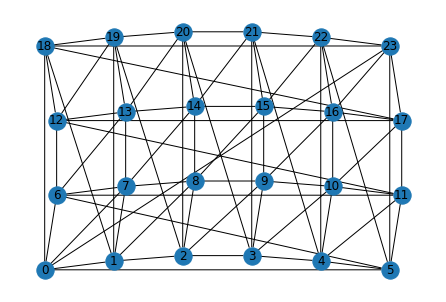

In [ ]:
pos = dict([(index, indextocoord(index, [rows, cols], distortion=0.2)) for index in range(np.prod([rows, cols]))])
triangular.draw(self_loop=False, with_labels=True, pos=pos)

## ***Hyper cubic lattice***

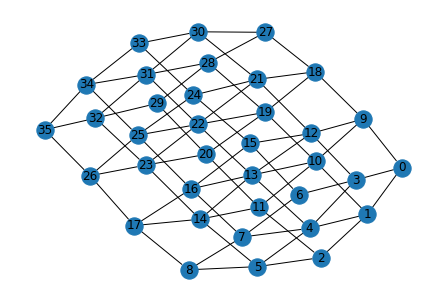

In [ ]:
# three dimension
size = (3, 3, 4)
edge_parameter = (-1.0, 1.0, 1.0)
onsite_parameter = 1.0
boundary_condition = ("open", "open", "open")
cubic = HyperCubic(
    size=size,
    edge_parameter=edge_parameter,
    onsite_parameter=onsite_parameter,
    boundary_condition=boundary_condition
)

cubic.draw(with_labels=True)

## ***The FHM from parameters(hopping matrix and on-site interaction)***

In [ ]:
hopping_matrix = np.array([
    [1. , -1. + 1.j, -5.+5.j], 
    [-1.-1.j, 2., 1.], 
    [-5.-5.j, 1., 2.]
])

onsite_interaction = 2.0

FHM = FermiHubbard.from_parameters(
    hopping_matrix=hopping_matrix,
    onsite_interaction=onsite_interaction
)

ham = FHM.second_q_ops()
print(ham)
print(FHM.hopping_matrix())

  NIIIII * (1+0j)
+ +I-III * (-1+1j)
+ -I+III * (1+1j)
+ +III-I * (-5+5j)
+ -III+I * (5+5j)
+ IINIII * (2+0j)
+ II+I-I * (1+0j)
+ II-I+I * (-1+0j)
+ IIIINI * (2+0j)
+ INIIII * (1+0j)
+ I+I-II * (-1+1j)
+ I-I+II * (1+1j)
+ I+III- * (-5+5j)
+ I-III+ * (5+5j)
+ IIINII * (2+0j)
+ III+I- * (1+0j)
+ III-I+ * (-1+0j)
+ IIIIIN * (2+0j)
+ NNIIII * (2+0j)
+ IINNII * (2+0j)
+ IIIINN * (2+0j)
[[ 1.+0.j -1.+1.j -5.+5.j]
 [-1.-1.j  2.+0.j  1.+0.j]
 [-5.-5.j  1.+0.j  2.+0.j]]
